# Librerias

In [35]:
# Configurar pandas para mostrar más valores
np.set_printoptions(threshold=np.inf)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
import random
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas
import sklearn.metrics as metrics

# hiperparametrización
from sklearn.model_selection import GridSearchCV

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

import xgboost as xgb

from numpy import random
random.seed(42)

from sklearn.model_selection import train_test_split

# Cargar datos

In [14]:
file_path = "C:/Users/Herre/Desktop/commercial_activity_df.csv"
file_path_2 = "C:/Users/Herre/Desktop/products_df.csv"
file_path_3 = "C:/Users\Herre\Desktop\sociodemographic_df.csv"

In [15]:
df_comercial_activity = pd.read_csv(file_path)
df_products = pd.read_csv(file_path_2)
df_socialdemographic = pd.read_csv(file_path_3)

# EDA: Análisis Exploratorio

## EDA df_comercial_activity

In [16]:
df_comercial_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   pk_cid           int64  
 2   pk_partition     object 
 3   entry_date       object 
 4   entry_channel    object 
 5   active_customer  float64
 6   segment          object 
dtypes: float64(1), int64(2), object(4)
memory usage: 318.5+ MB


In [17]:
df_comercial_activity.head()

Unnamed: 0   pk_cid pk_partition  entry_date entry_channel  \
0           0  1375586   2018-01-28  2018-01-12           KHL   
1           1  1050611   2018-01-28  2015-08-10           KHE   
2           2  1050612   2018-01-28  2015-08-10           KHE   
3           3  1050613   2018-01-28  2015-08-10           KHD   
4           4  1050614   2018-01-28  2015-08-10           KHE   

   active_customer             segment  
0              1.0   02 - PARTICULARES  
1              0.0  03 - UNIVERSITARIO  
2              0.0  03 - UNIVERSITARIO  
3              0.0  03 - UNIVERSITARIO  
4              1.0  03 - UNIVERSITARIO

In [18]:
columnas_categoricas = df_comercial_activity.select_dtypes(include=['object']).columns.tolist()
columnas_numericas = df_comercial_activity.select_dtypes(include=['int', 'float']).columns.tolist()

In [19]:
for col in columnas_categoricas:
    unique_values = df_comercial_activity[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in pk_partition: ['2018-01-28' '2018-02-28' '2018-03-28' '2018-04-28' '2018-05-28'
 '2018-06-28' '2018-07-28' '2018-08-28' '2018-09-28' '2018-10-28'
 '2018-11-28' '2018-12-28' '2019-01-28' '2019-02-28' '2019-03-28'
 '2019-04-28' '2019-05-28']
Unique values in entry_date: ['2018-01-12' '2015-08-10' '2015-08-16' ... '2019-05-25' '2019-05-01'
 '2019-05-15']
Unique values in entry_channel: ['KHL' 'KHE' 'KHD' 'KFA' 'KFC' 'KAT' 'KAZ' 'RED' 'KHC' 'KHK' 'KGN' 'KHM'
 'KHO' 'KDH' 'KEH' 'KAD' 'KBG' nan 'KGC' 'KHF' 'KFK' 'KHN' 'KAB' 'KAG'
 'KAA' 'KGX' 'KAR' 'KAK' 'KBZ' '007' 'KBO' 'KCB' '013' 'KAY' 'KBE' 'KAS'
 'KCL' '004' 'KAF' 'KCC' 'KEY' 'KDT' 'KAQ' 'KAH' 'KAM' 'KAJ' 'KFD' 'KCH'
 'KFS' 'KAW' 'KAE' 'KBH' 'KDR' 'KHQ' 'KBW' 'KBY' 'KCI' 'KEJ' 'KFF' 'KBU'
 'KAI' 'KCK' 'KDA' 'KES' 'KHP' 'KFL' 'KDS' 'KFP' 'KHS']
Unique values in segment: ['02 - PARTICULARES' '03 - UNIVERSITARIO' '01 - TOP' nan]


In [20]:
for col in columnas_numericas:
    unique_values = df_comercial_activity[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in Unnamed: 0: [       0        1        2 ... 13647306 13647307 13647308]
Unique values in pk_cid: [1375586 1050611 1050612 ... 1173729 1164094 1550586]
Unique values in active_customer: [1. 0.]


Convertir columnas tipo object a tipo datetime

In [32]:
# Convertir la columna 'pk_partition' a tipo datetime
df_comercial_activity['pk_partition'] = pd.to_datetime(df_comercial_activity['pk_partition'])

# Extraer solo la parte de la fecha (sin la hora)
df_comercial_activity['pk_partition'] = df_comercial_activity['pk_partition'].dt.date

In [39]:
df_comercial_activity['pk_partition'].unique()
#Vemos que ya se han hecho los cambios

array([datetime.date(2018, 1, 28), datetime.date(2018, 2, 28),
       datetime.date(2018, 3, 28), datetime.date(2018, 4, 28),
       datetime.date(2018, 5, 28), datetime.date(2018, 6, 28),
       datetime.date(2018, 7, 28), datetime.date(2018, 8, 28),
       datetime.date(2018, 9, 28), datetime.date(2018, 10, 28),
       datetime.date(2018, 11, 28), datetime.date(2018, 12, 28),
       datetime.date(2019, 1, 28), datetime.date(2019, 2, 28),
       datetime.date(2019, 3, 28), datetime.date(2019, 4, 28),
       datetime.date(2019, 5, 28)], dtype=object)

Hay una fecha en la columna entry_date que no es válida, por ejemplo, un día que no existe en el mes especificado. 

In [38]:
# Convertir la columna 'entry_date' a tipo datetime manejando excepciones
df_comercial_activity['entry_date'] = pd.to_datetime(df_comercial_activity['entry_date'], errors='coerce')

# Identificar filas con fechas no válidas en 'entry_date'
invalid_entry_dates = df_comercial_activity[df_comercial_activity['entry_date'].isnull()]

# Mostrar las filas con fechas no válidas en 'entry_date'
print("Filas con fechas no válidas en 'entry_date':")
print(invalid_entry_dates[['entry_date']])

# Extraer solo la parte de la fecha (sin la hora) para 'entry_date'
df_comercial_activity['entry_date'] = df_comercial_activity['entry_date'].dt.date

# Verificar la conversión
print(df_comercial_activity[['pk_partition', 'entry_date']].head())


Filas con fechas no válidas en 'entry_date':
        entry_date
78753          NaT
78768          NaT
78770          NaT
78771          NaT
78772          NaT
...            ...
5839112        NaT
5839113        NaT
5839114        NaT
5839115        NaT
5839117        NaT

[6413 rows x 1 columns]
  pk_partition  entry_date
0   2018-01-28  2018-01-12
1   2018-01-28  2015-08-10
2   2018-01-28  2015-08-10
3   2018-01-28  2015-08-10
4   2018-01-28  2015-08-10


## EDA df_products

In [25]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   pk_cid              int64  
 2   pk_partition        object 
 3   short_term_deposit  int64  
 4   loans               int64  
 5   mortgage            int64  
 6   funds               int64  
 7   securities          int64  
 8   long_term_deposit   int64  
 9   em_account_pp       int64  
 10  credit_card         int64  
 11  payroll             float64
 12  pension_plan        float64
 13  payroll_account     int64  
 14  emc_account         int64  
 15  debit_card          int64  
 16  em_account_p        int64  
 17  em_acount           int64  
dtypes: float64(2), int64(15), object(1)
memory usage: 818.9+ MB


In [26]:
df_products.head()

Unnamed: 0   pk_cid pk_partition  short_term_deposit  loans  mortgage  \
0           0  1375586   2018-01-28                   0      0         0   
1           1  1050611   2018-01-28                   0      0         0   
2           2  1050612   2018-01-28                   0      0         0   
3           3  1050613   2018-01-28                   1      0         0   
4           4  1050614   2018-01-28                   0      0         0   

   funds  securities  long_term_deposit  em_account_pp  credit_card  payroll  \
0      0           0                  0              0            0      0.0   
1      0           0                  0              0            0      0.0   
2      0           0                  0              0            0      0.0   
3      0           0                  0              0            0      0.0   
4      0           0                  0              0            0      0.0   

   pension_plan  payroll_account  emc_account  debit_card  em_account_p  \
0           0.0                0            0           0             0   
1           0.0                0            0           0             0   
2           0.0                0            0           0             0   
3           0.0                0            0           0             0   
4           0.0                0            0           0             0   

   em_acount  
0          1  
1          1  
2          1  
3          0  
4          1

In [40]:
columnas_categoricas_1 = df_products.select_dtypes(include=['object']).columns.tolist()
columnas_numericas_1 = df_products.select_dtypes(include=['int', 'float']).columns.tolist()

In [41]:
for col in columnas_categoricas_1:
    unique_values = df_products[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in pk_partition: ['2018-01-28' '2018-02-28' '2018-03-28' '2018-04-28' '2018-05-28'
 '2018-06-28' '2018-07-28' '2018-08-28' '2018-09-28' '2018-10-28'
 '2018-11-28' '2018-12-28' '2019-01-28' '2019-02-28' '2019-03-28'
 '2019-04-28' '2019-05-28']


In [ ]:
#for col in columnas_numericas_1:
 #   unique_values = df_products[col].unique()
  #  print(f"Unique values in {col}: {unique_values}")

Convertir columnas tipo object a tipo datetime

In [43]:
# Convertir la columna 'pk_partition' a tipo datetime
df_products['pk_partition'] = pd.to_datetime(df_products['pk_partition'])

# Extraer solo la parte de la fecha (sin la hora)
df_products['pk_partition'] = df_products['pk_partition'].dt.date

In [44]:
df_products['pk_partition'].unique()
#Vemos que se han hecho los cambios

array([datetime.date(2018, 1, 28), datetime.date(2018, 2, 28),
       datetime.date(2018, 3, 28), datetime.date(2018, 4, 28),
       datetime.date(2018, 5, 28), datetime.date(2018, 6, 28),
       datetime.date(2018, 7, 28), datetime.date(2018, 8, 28),
       datetime.date(2018, 9, 28), datetime.date(2018, 10, 28),
       datetime.date(2018, 11, 28), datetime.date(2018, 12, 28),
       datetime.date(2019, 1, 28), datetime.date(2019, 2, 28),
       datetime.date(2019, 3, 28), datetime.date(2019, 4, 28),
       datetime.date(2019, 5, 28)], dtype=object)

## EDA df_socialdemographic

In [47]:
df_socialdemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   pk_cid        int64  
 2   pk_partition  object 
 3   country_id    object 
 4   region_code   float64
 5   gender        object 
 6   age           int64  
 7   deceased      object 
 8   salary        float64
dtypes: float64(2), int64(3), object(4)
memory usage: 409.4+ MB


In [48]:
df_socialdemographic.head()

Unnamed: 0   pk_cid pk_partition country_id  region_code gender  age  \
0           0  1375586   2018-01-28         ES         29.0      H   35   
1           1  1050611   2018-01-28         ES         13.0      V   23   
2           2  1050612   2018-01-28         ES         13.0      V   23   
3           3  1050613   2018-01-28         ES         50.0      H   22   
4           4  1050614   2018-01-28         ES         50.0      V   23   

  deceased     salary  
0        N   87218.10  
1        N   35548.74  
2        N  122179.11  
3        N  119775.54  
4        N        NaN

In [49]:
columnas_categoricas_2 = df_socialdemographic.select_dtypes(include=['object']).columns.tolist()
columnas_numericas_2 = df_socialdemographic.select_dtypes(include=['int', 'float']).columns.tolist()

In [50]:
for col in columnas_categoricas_2:
    unique_values = df_socialdemographic[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in pk_partition: [datetime.date(2018, 1, 28) datetime.date(2018, 2, 28)
 datetime.date(2018, 3, 28) datetime.date(2018, 4, 28)
 datetime.date(2018, 5, 28) datetime.date(2018, 6, 28)
 datetime.date(2018, 7, 28) datetime.date(2018, 8, 28)
 datetime.date(2018, 9, 28) datetime.date(2018, 10, 28)
 datetime.date(2018, 11, 28) datetime.date(2018, 12, 28)
 datetime.date(2019, 1, 28) datetime.date(2019, 2, 28)
 datetime.date(2019, 3, 28) datetime.date(2019, 4, 28)
 datetime.date(2019, 5, 28)]
Unique values in country_id: ['ES' 'CA' 'CH' 'CL' 'IE' 'AT' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE' 'US'
 'MX' 'PL' 'MA' 'GT' 'GA' 'CO' 'BR' 'RU' 'IT' 'NO' 'SN' 'MR' 'ET' 'CN'
 'CM' 'SA' 'CI' 'QA' 'LU' 'SE' 'DJ' 'PT' 'JM' 'RO' 'HU' 'DZ' 'PE']
Unique values in gender: ['H' 'V' nan]
Unique values in deceased: ['N' 'S']


In [51]:
#for col in columnas_numericas_2:
 #   unique_values = df_socialdemographic[col].unique()
  #  print(f"Unique values in {col}: {unique_values}")

KeyboardInterrupt: 

Convertir columnas tipo object en tipo datatime

In [52]:
# Convertir la columna 'pk_partition' a tipo datetime
df_socialdemographic['pk_partition'] = pd.to_datetime(df_socialdemographic['pk_partition'])

# Extraer solo la parte de la fecha (sin la hora)
df_socialdemographic['pk_partition'] = df_socialdemographic['pk_partition'].dt.date

In [53]:
df_socialdemographic['pk_partition'].unique()
#Vemos que se han hecho los cambios

array([datetime.date(2018, 1, 28), datetime.date(2018, 2, 28),
       datetime.date(2018, 3, 28), datetime.date(2018, 4, 28),
       datetime.date(2018, 5, 28), datetime.date(2018, 6, 28),
       datetime.date(2018, 7, 28), datetime.date(2018, 8, 28),
       datetime.date(2018, 9, 28), datetime.date(2018, 10, 28),
       datetime.date(2018, 11, 28), datetime.date(2018, 12, 28),
       datetime.date(2019, 1, 28), datetime.date(2019, 2, 28),
       datetime.date(2019, 3, 28), datetime.date(2019, 4, 28),
       datetime.date(2019, 5, 28)], dtype=object)

## Análisis Univariable

### Análisis Univariable df_comercial_activity

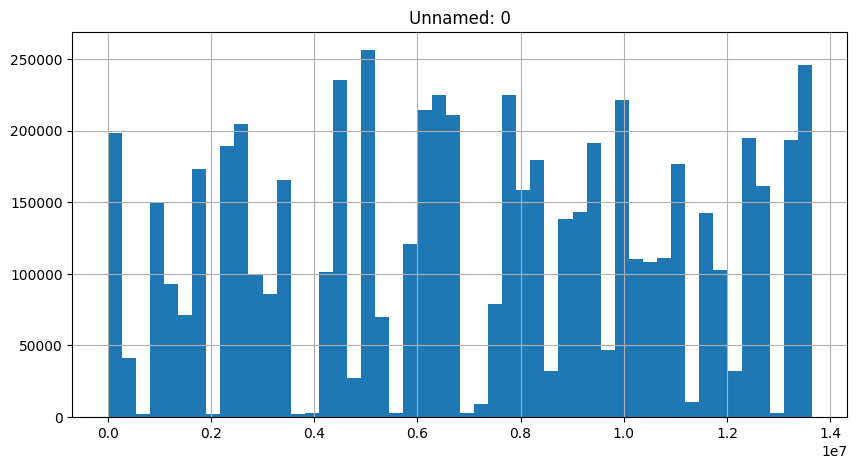

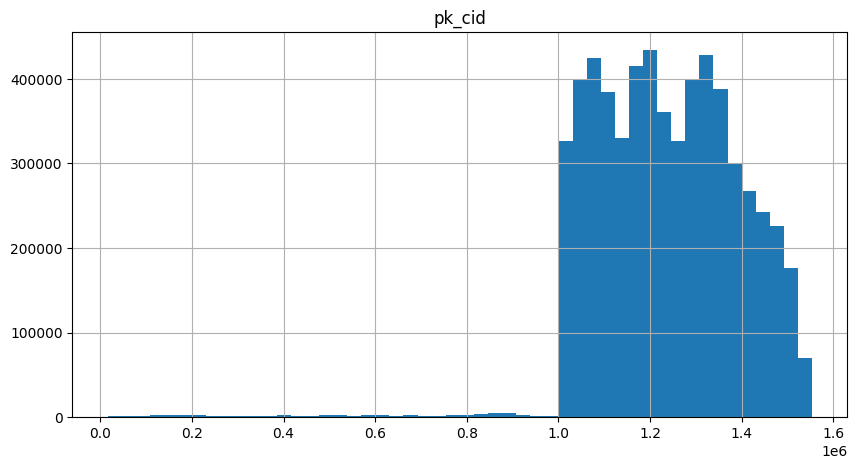

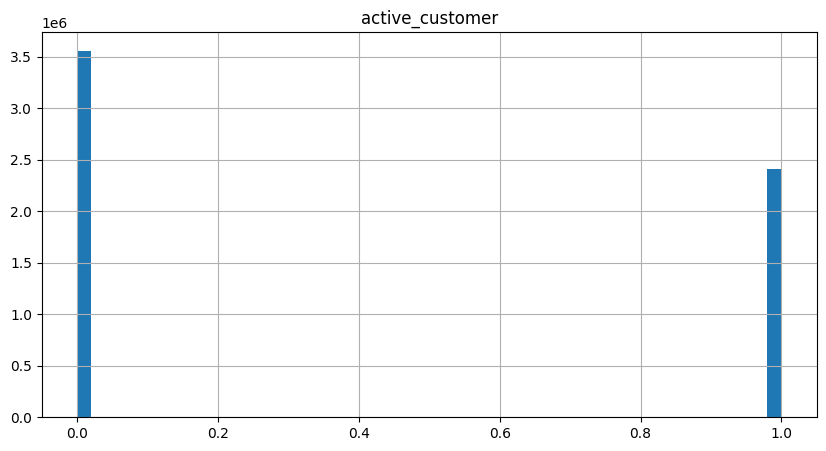

In [54]:
#Primero vamos a hacer los histogramas de las variables numéricas.
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns = df_comercial_activity.select_dtypes(include=[int, float]).columns

# Crear gráficos individuales
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    df_comercial_activity[col].hist(bins=50)
    plt.title(col)
    plt.show()

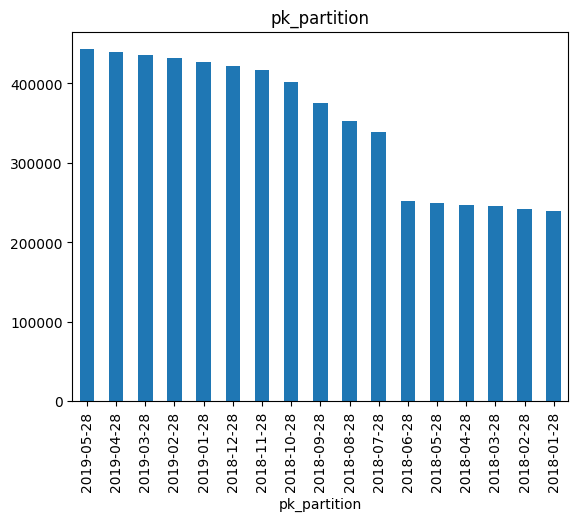

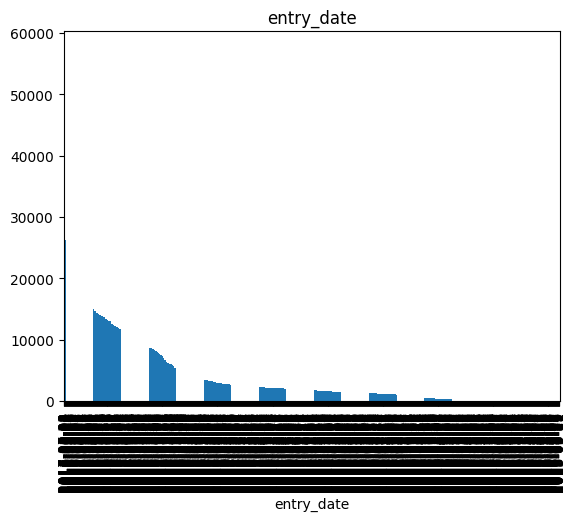

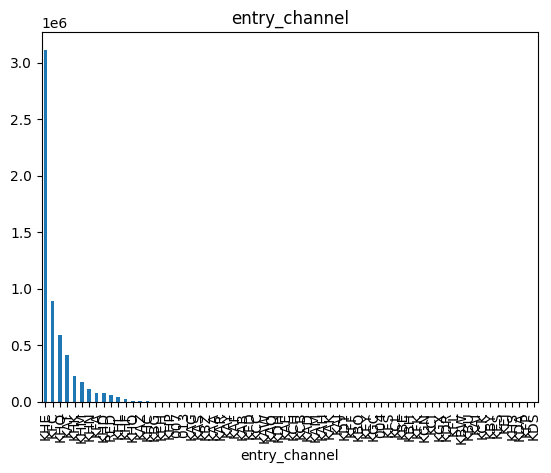

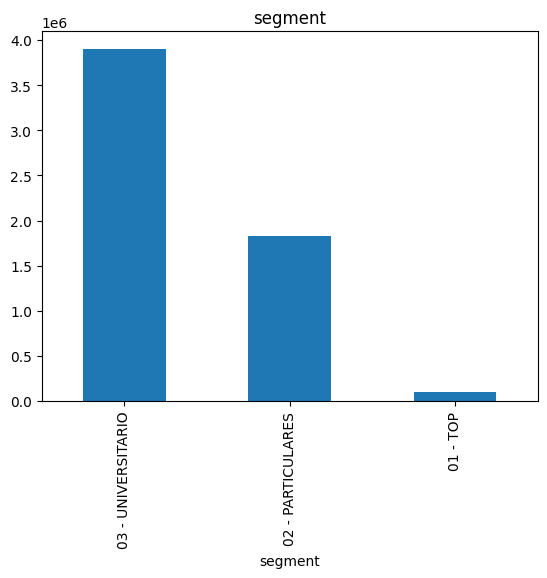

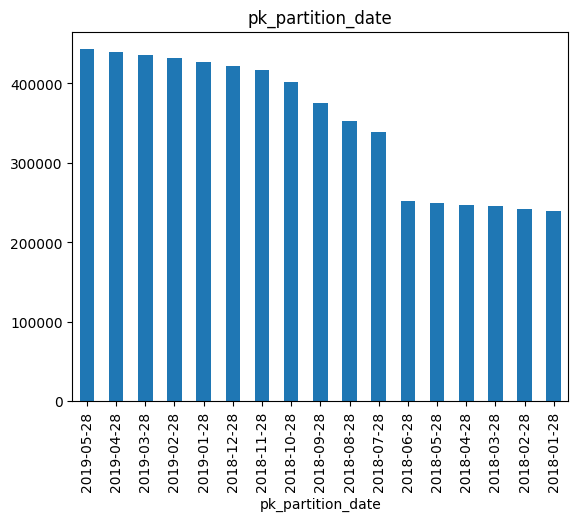

In [55]:
#Ahora crearemos histogramas para todas las columnas categóricas
categorical_columns = df_comercial_activity.select_dtypes(include=[object, 'bool'])
for column in categorical_columns:
    df_comercial_activity[column].value_counts().plot(kind='bar', title=column)
    plt.show()

### Análisis Univariable df_products

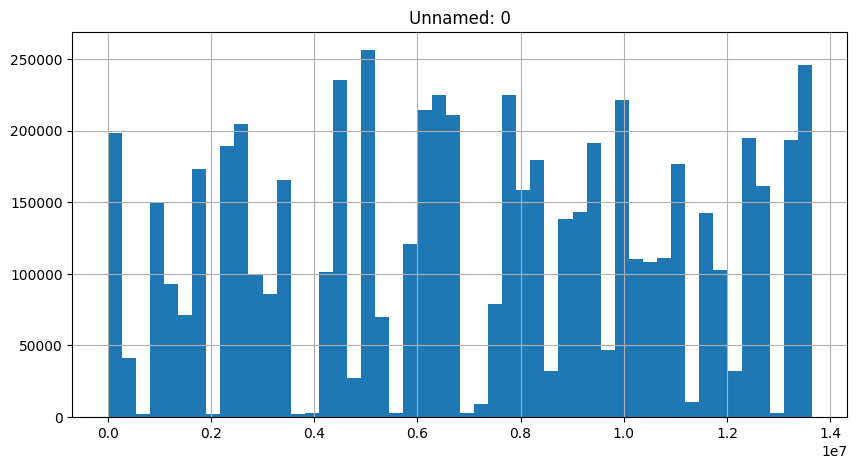

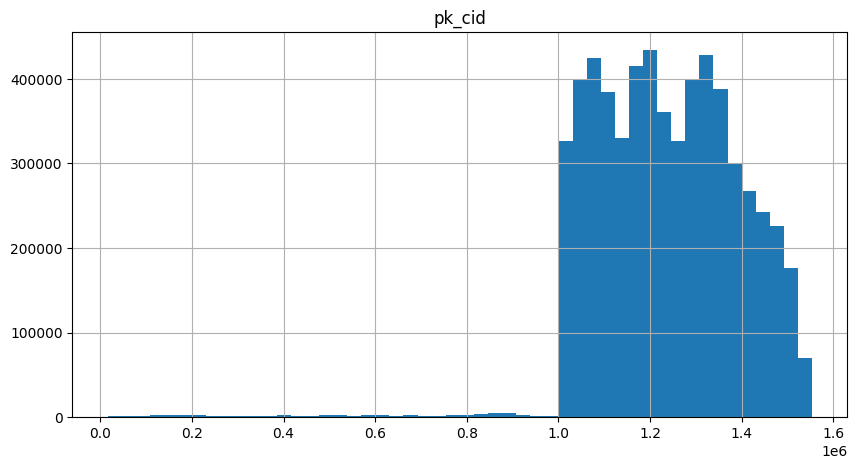

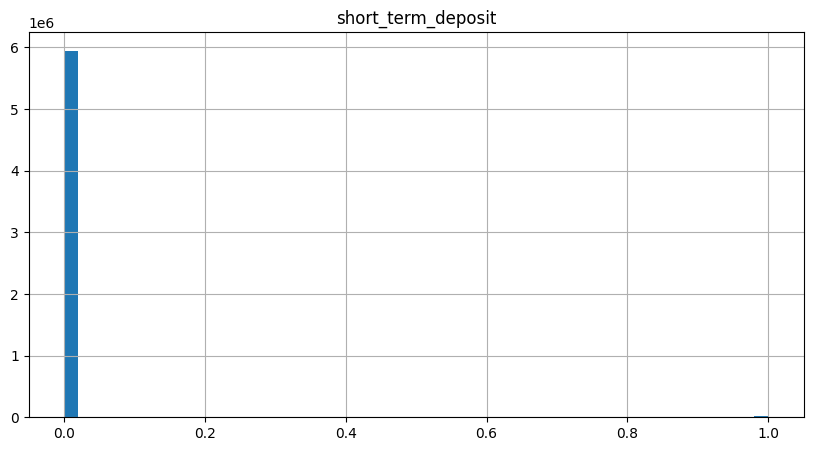

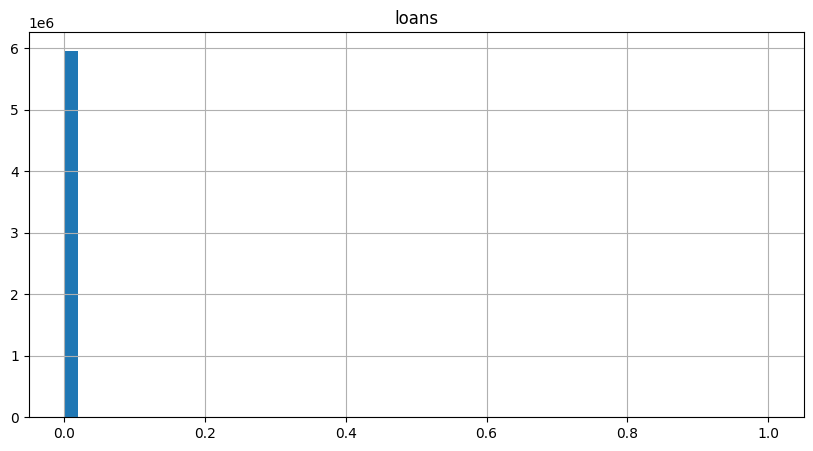

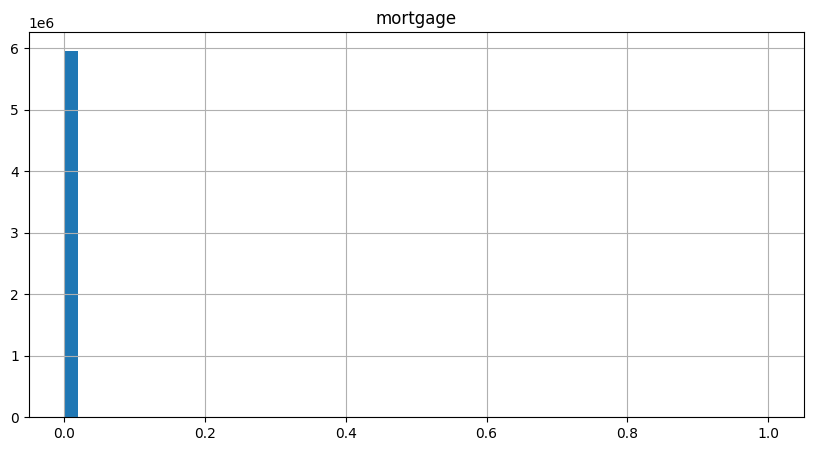

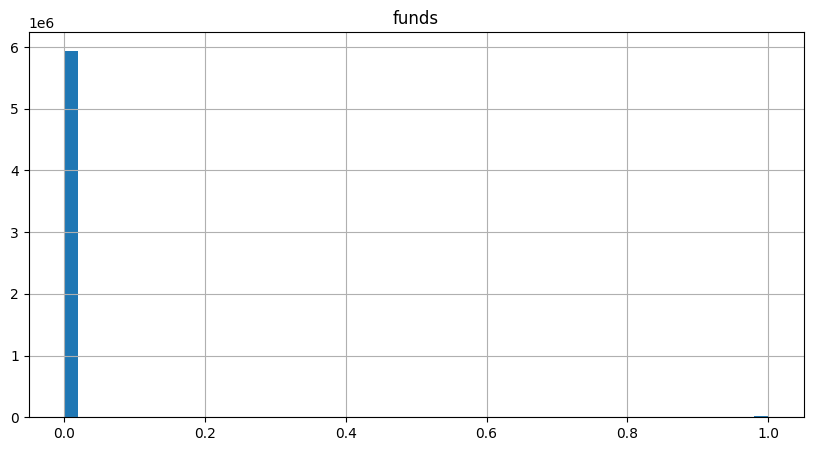

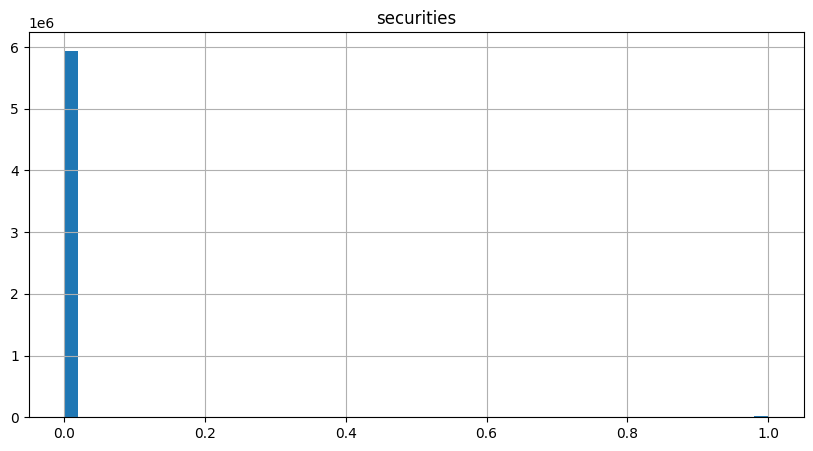

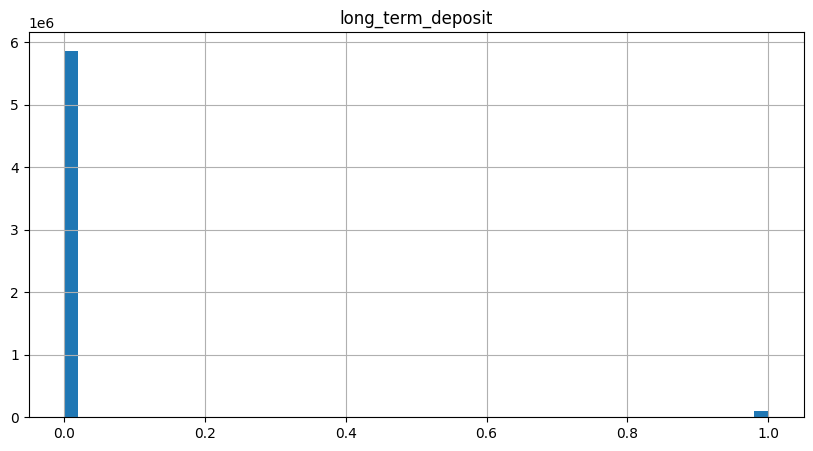

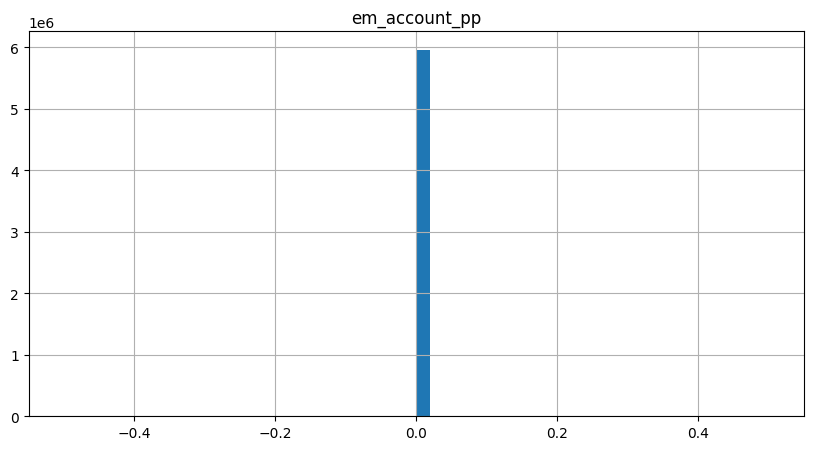

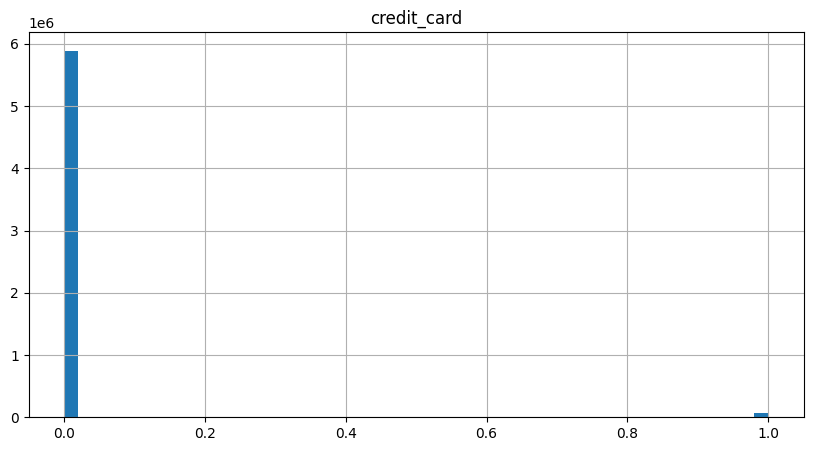

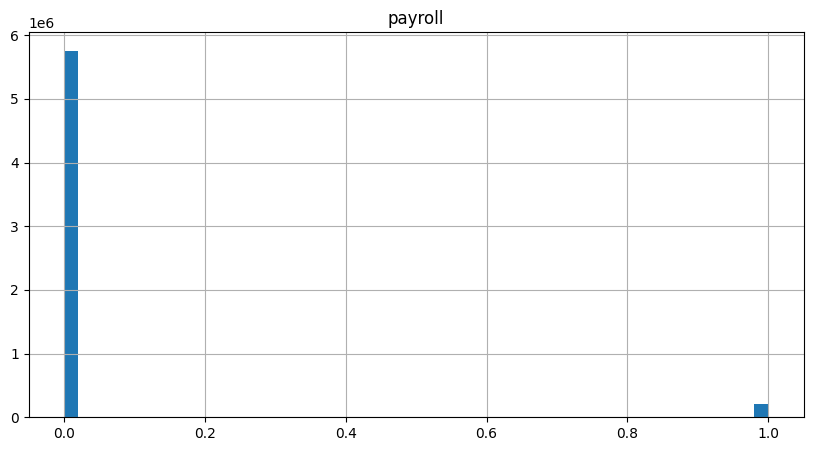

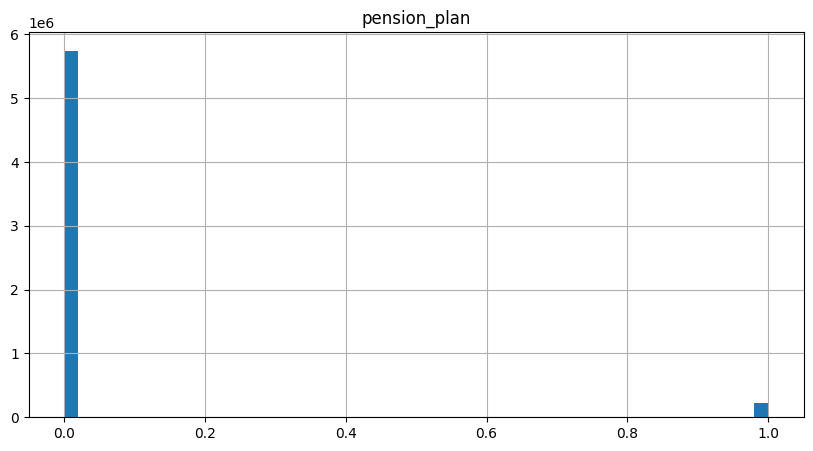

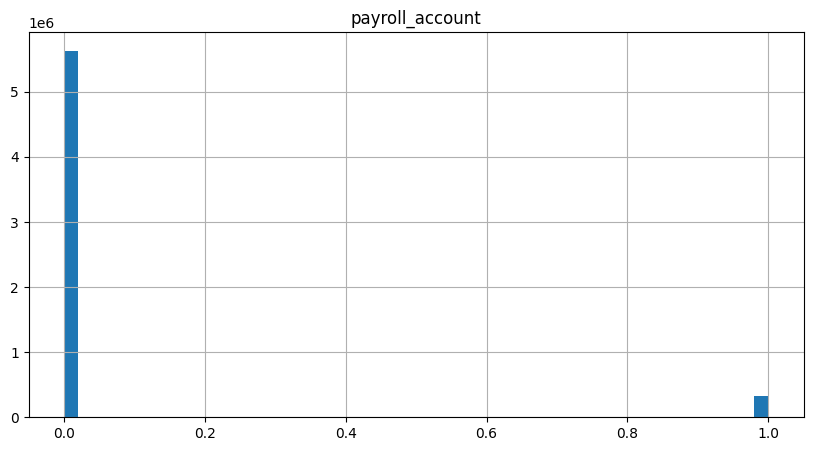

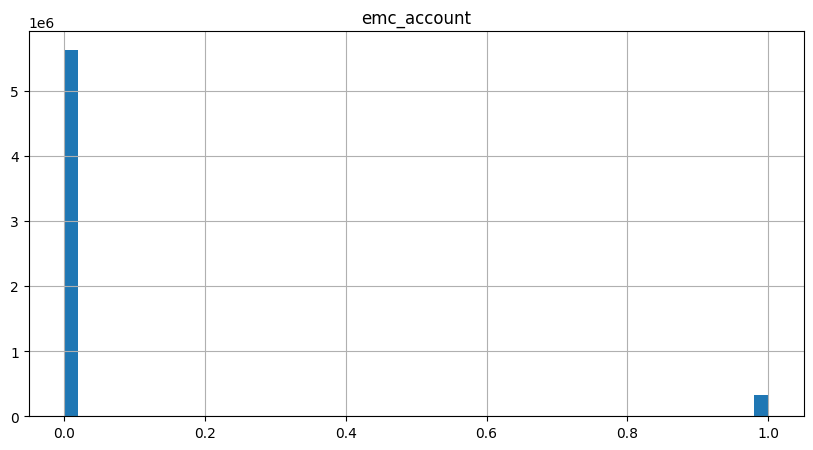

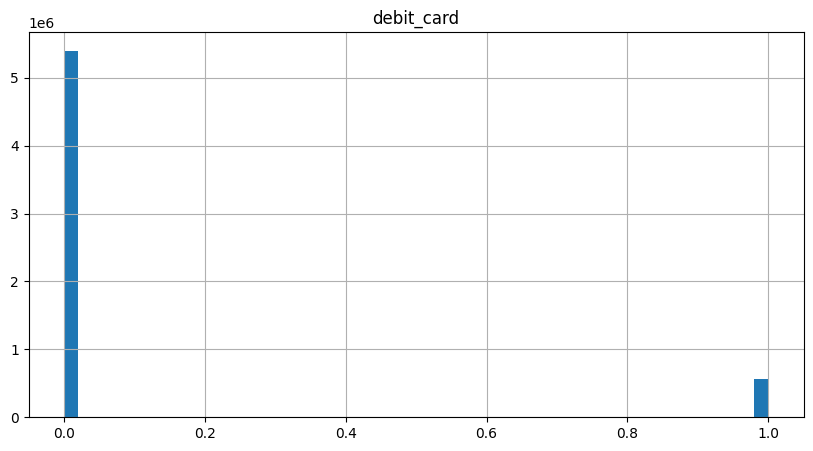

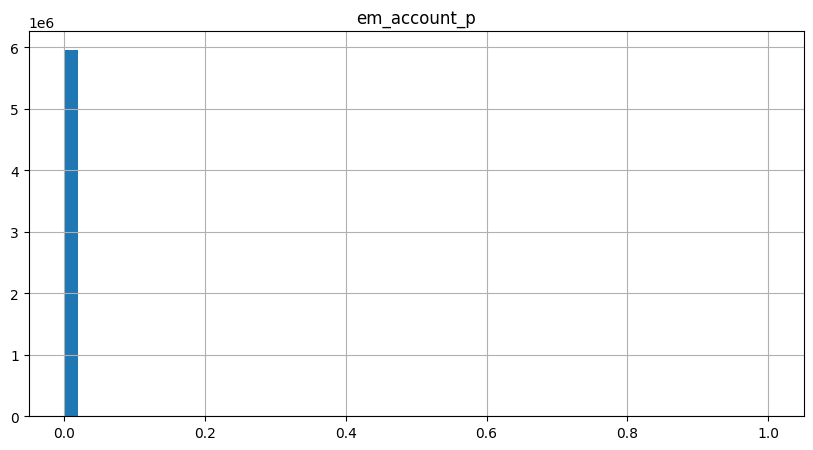

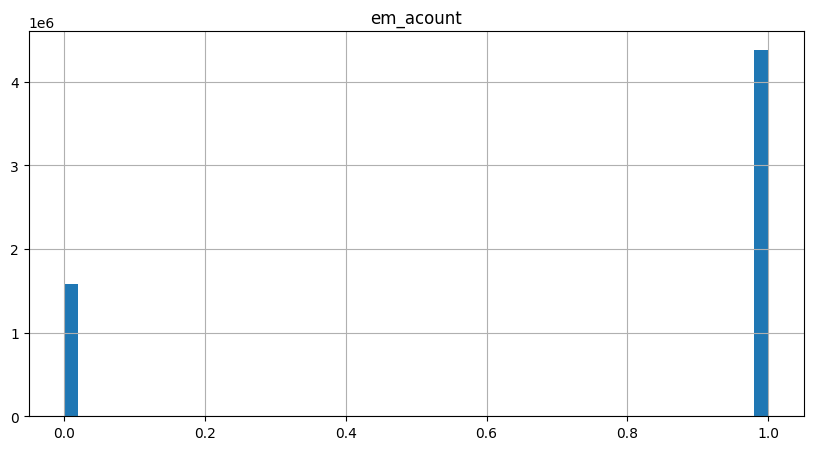

In [56]:
#Primero vamos a hacer los histogramas de las variables numéricas.
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns_1 = df_products.select_dtypes(include=[int, float]).columns

# Crear gráficos individuales
for col in numeric_columns_1:
    plt.figure(figsize=(10, 5))
    df_products[col].hist(bins=50)
    plt.title(col)
    plt.show()

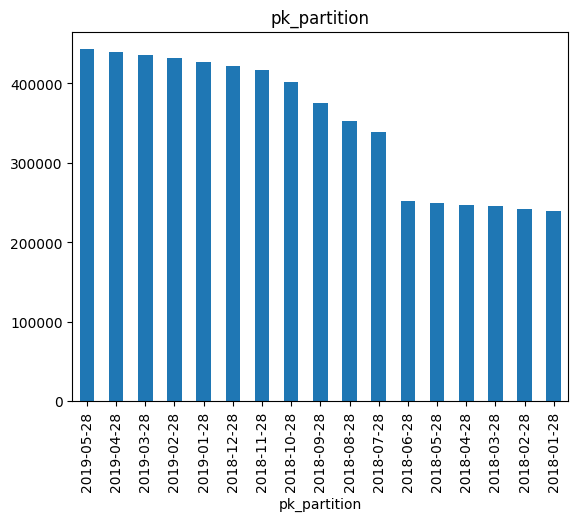

KeyError: 'entry_date'

In [57]:
#Ahora crearemos histogramas para todas las columnas categóricas
categorical_columns_1 = df_products.select_dtypes(include=[object, 'bool'])
for column in categorical_columns:
    df_products[column].value_counts().plot(kind='bar', title=column)
    plt.show()

### Análisis Univariable df_socialdemographic

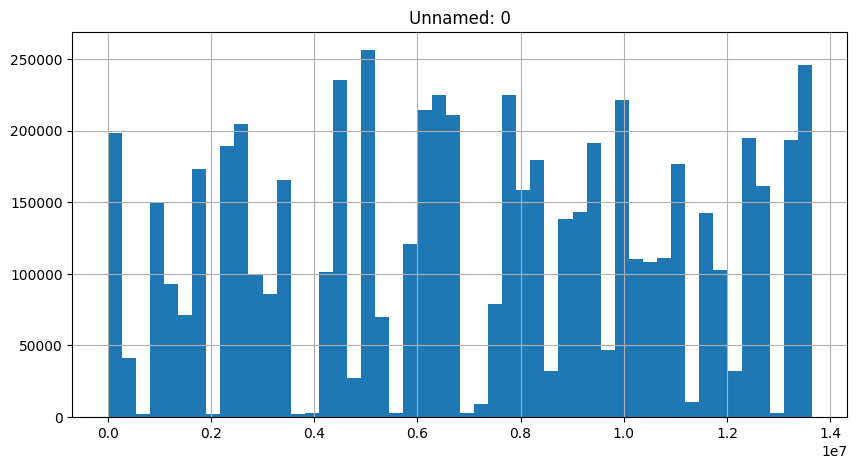

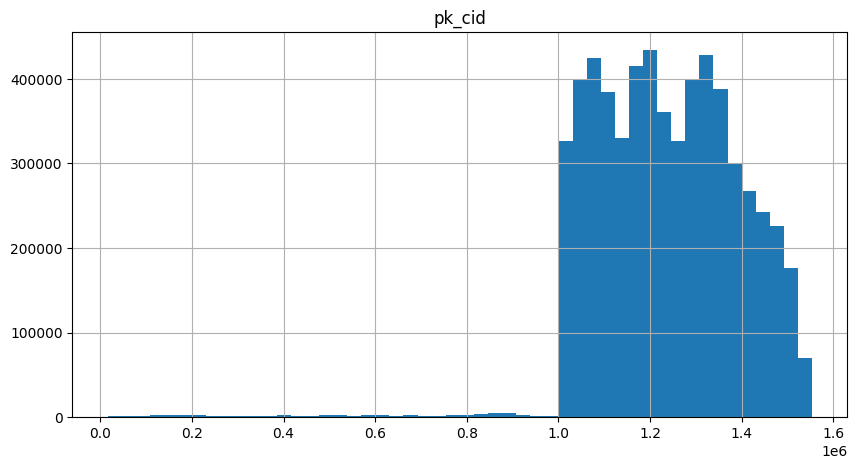

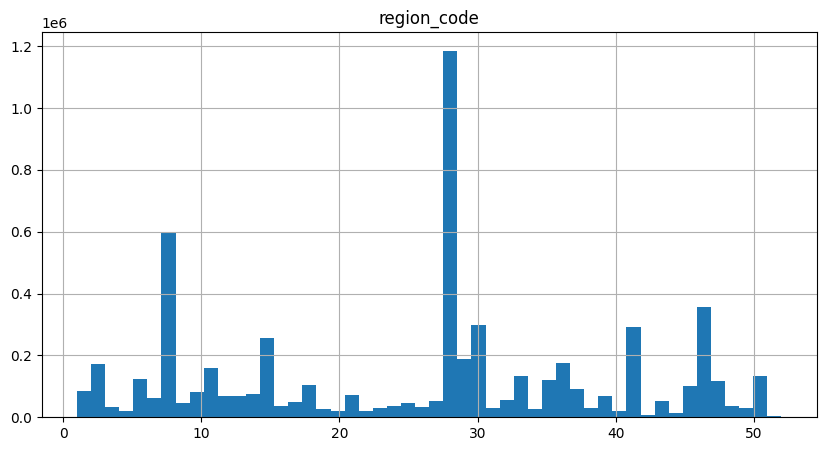

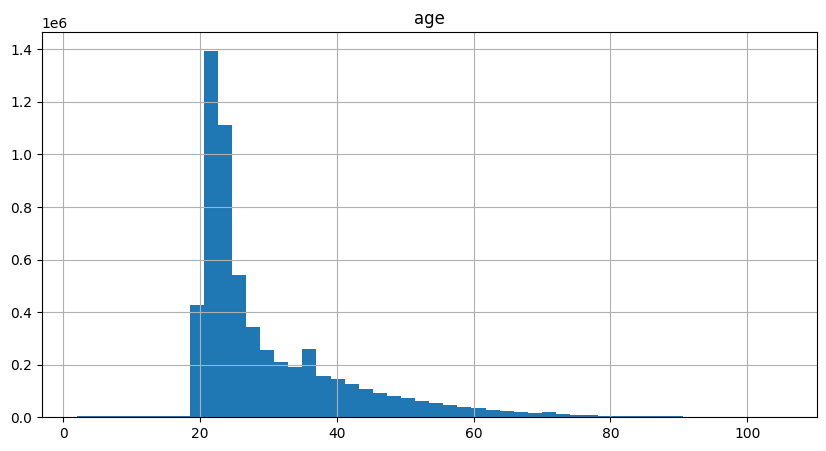

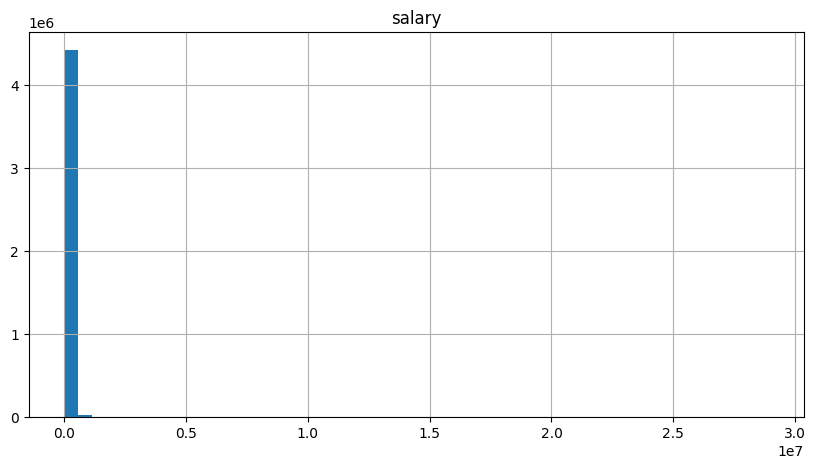

In [58]:
#Primero vamos a hacer los histogramas de las variables numéricas.
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns_2 = df_socialdemographic.select_dtypes(include=[int, float]).columns

# Crear gráficos individuales
for col in numeric_columns_2:
    plt.figure(figsize=(10, 5))
    df_socialdemographic[col].hist(bins=50)
    plt.title(col)
    plt.show()

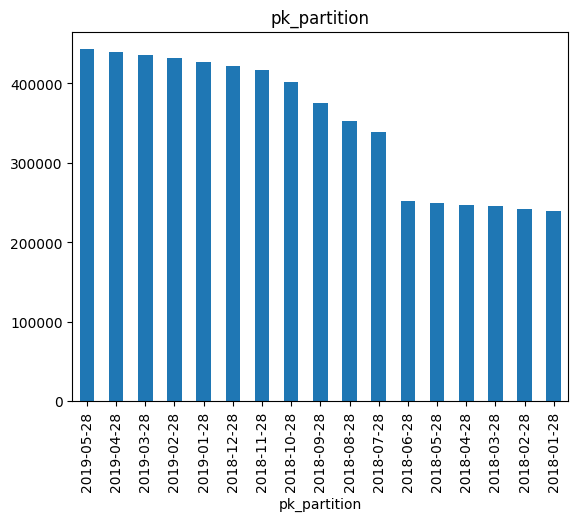

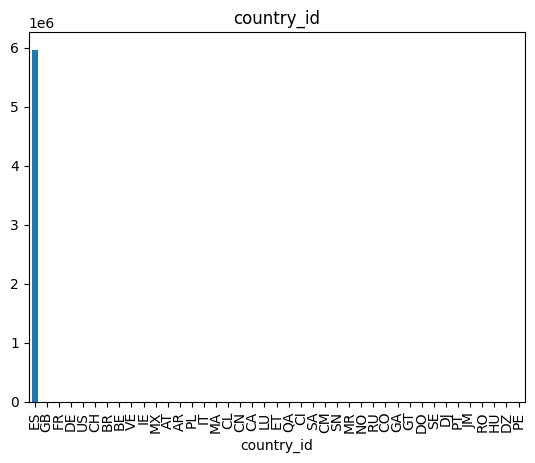

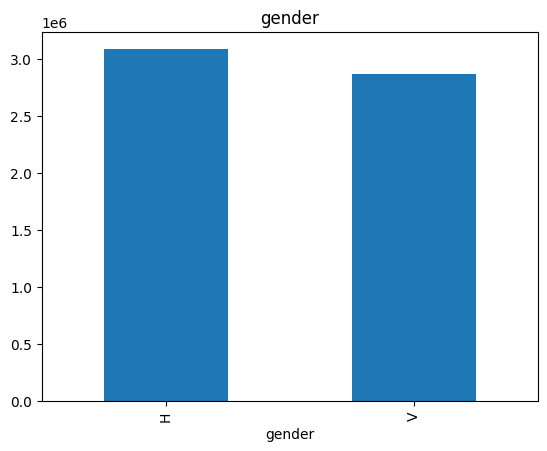

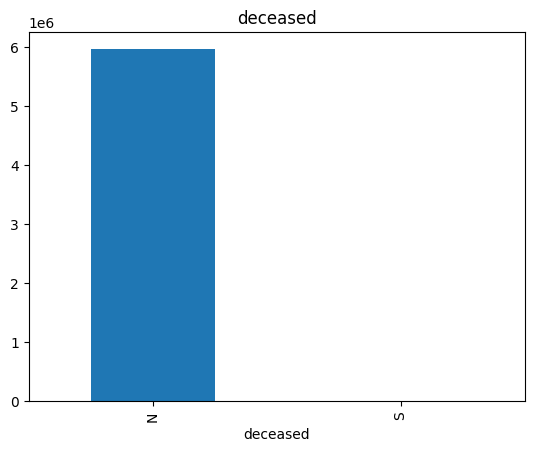

In [59]:
#Ahora crearemos histogramas para todas las columnas categóricas
categorical_columns_2 = df_socialdemographic.select_dtypes(include=[object, 'bool'])
for column in categorical_columns_2:
    df_socialdemographic[column].value_counts().plot(kind='bar', title=column)
    plt.show()

# Data Cleaning

In [60]:
#Ver duplicados

In [61]:
df_comercial_activity[df_comercial_activity.duplicated(keep=False)]

Empty DataFrame
Columns: [Unnamed: 0, pk_cid, pk_partition, entry_date, entry_channel, active_customer, segment, pk_partition_date]
Index: []

In [62]:
df_products[df_products.duplicated(keep=False)]

Empty DataFrame
Columns: [Unnamed: 0, pk_cid, pk_partition, short_term_deposit, loans, mortgage, funds, securities, long_term_deposit, em_account_pp, credit_card, payroll, pension_plan, payroll_account, emc_account, debit_card, em_account_p, em_acount]
Index: []

In [63]:
df_socialdemographic[df_socialdemographic.duplicated(keep=False)]

Empty DataFrame
Columns: [Unnamed: 0, pk_cid, pk_partition, country_id, region_code, gender, age, deceased, salary]
Index: []

## NULOS

### Nulos df_comercial_activity

In [64]:
#Vemos los nulos que hay en cada columna
df_comercial_activity.isnull().sum()

Unnamed: 0                0
pk_cid                    0
pk_partition              0
entry_date             6413
entry_channel        133033
active_customer           0
segment              133944
pk_partition_date         0
dtype: int64

In [65]:
#Como previamente hemos hecho una visualización de las columnas y sus variables ya tenemos una idea clara de las acciones que vamos a realizar.

In [66]:
#Eliminamos la columna Unnamed

df_comercial_activity.drop(columns=['Unnamed: 0'], inplace=True)

Nulos columna "entry_channel"

In [67]:
df_comercial_activity['entry_channel'].value_counts(normalize=True)

entry_channel
KHE    5.341347e-01
KFC    1.527679e-01
KHQ    1.012506e-01
KAT    7.137080e-02
KHK    3.948564e-02
           ...     
KEJ    1.372238e-06
KHS    8.576490e-07
KDA    3.430596e-07
KFP    3.430596e-07
KDS    1.715298e-07
Name: proportion, Length: 68, dtype: float64

In [68]:
#Vamos a imputar los nulos en base al porcentaje que ocupan sobre el total sus variables.


# Calcular el porcentaje de cada categoría en entry_channel
porcentajes = df_comercial_activity['entry_channel'].value_counts(normalize=True)

# Número de nulos en la columna entry_channel
nulos_count = df_comercial_activity['entry_channel'].isnull().sum()

# Crear una lista para almacenar las categorías de acuerdo al porcentaje
nulos_relleno = []

for categoria, porcentaje in porcentajes.items():
    count_categoria = int(round(porcentaje * nulos_count))
    nulos_relleno.extend([categoria] * count_categoria)

# Ajustar la lista en caso de diferencias debido a redondeos
if len(nulos_relleno) < nulos_count:
    diferencia = nulos_count - len(nulos_relleno)
    nulos_relleno.extend(np.random.choice(porcentajes.index, diferencia, p=porcentajes.values))
elif len(nulos_relleno) > nulos_count:
    nulos_relleno = nulos_relleno[:nulos_count]

# Barajar la lista de relleno para distribuir aleatoriamente los valores
np.random.shuffle(nulos_relleno)

# Rellenar los nulos en la columna entry_channel
df_comercial_activity.loc[df_comercial_activity['entry_channel'].isnull(), 'entry_channel'] = nulos_relleno

# Verificar el resultado
print(df_comercial_activity['entry_channel'].isnull().sum())
print(df_comercial_activity['entry_channel'].value_counts(normalize=True))


0
entry_channel
KHE    5.341351e-01
KFC    1.527680e-01
KHQ    1.012508e-01
KAT    7.137086e-02
KHK    3.948566e-02
           ...     
KEJ    1.341624e-06
KHS    8.385148e-07
KDA    3.354059e-07
KFP    3.354059e-07
KDS    1.677030e-07
Name: proportion, Length: 68, dtype: float64


In [69]:
#Una vez imputados los nulos agrupamos todas quellas variables que representan muy poco porcentaje sobre el total, de esta forma reducimos variables.
#Vamos a agrupar todas aquellas variables que representen el 2% o menos
# Calcular el porcentaje de cada categoría en entry_channel
porcentajes = df_comercial_activity['entry_channel'].value_counts(normalize=True)

# Identificar las categorías con porcentaje menor o igual al 2%
categorias_bajas = porcentajes[porcentajes <= 0.02].index

# Reemplazar las categorías de bajo porcentaje con "Otros"
df_comercial_activity['entry_channel'] = df_comercial_activity['entry_channel'].replace(categorias_bajas, 'Otros')

# Verificar el resultado
print(df_comercial_activity['entry_channel'].value_counts(normalize=True))


entry_channel
KHE      0.534135
KFC      0.152768
KHQ      0.101251
KAT      0.071371
Otros    0.070699
KHK      0.039486
KHM      0.030291
Name: proportion, dtype: float64


Nulos columna "segment"

In [70]:
#Imputaremos los nulos con la palabra "Unknown"
df_comercial_activity['segment'].fillna('Unknown', inplace=True)

In [71]:
df_comercial_activity.reset_index(drop=True,inplace=True)

### Nulos df_products

In [72]:
df_products.isnull().sum()

Unnamed: 0             0
pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

In [73]:
#Eliminamos la columna Unnamed

df_products.drop(columns=['Unnamed: 0'], inplace=True)

In [74]:
#En esta base de datos la cantidad de nulos no es significativa así que los vamos a eliminar.
df_products = df_products.dropna(subset=['payroll', 'pension_plan'])

In [75]:
df_products["em_account_pp"].unique()
#Vemos que en la columna em_account_pp solo hay una variable (0). Esa columna no aporta nada

array([0], dtype=int64)

In [76]:
df_products.drop(columns=['em_account_pp'], inplace=True)

In [77]:
df_products.reset_index(drop=True,inplace=True)

### Nulos df_socialdemographic

In [78]:
df_socialdemographic.isnull().sum()

Unnamed: 0            0
pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1512103
dtype: int64

In [79]:
#Eliminamos la columna Unnamed

df_socialdemographic.drop(columns=['Unnamed: 0'], inplace=True)

In [80]:
#Primero vamos a agrupar todas las variables menos (ES) de la columna "country_id" en una sola variable llamada Otros
# Agrupar todas las variables menos 'ES' en 'Otros' para la columna 'country_id'
df_socialdemographic['country_id'] = df_socialdemographic['country_id'].apply(lambda x: x if x == 'ES' else 'Otros')

# Verificar el resultado
print(df_socialdemographic['country_id'].value_counts())


country_id
ES       5960672
Otros       2252
Name: count, dtype: int64


In [81]:
#Ahora vamos a agrupar las cariables de la columna "age" en varios grupos de edades

# Definir los límites de los grupos de edad
bins = [0, 17, 25, 35, 45, 65, 110]

# Definir los nombres de los grupos de edad
labels = ['0-17', '18-25', '26-35', '36-45', '46-65', '66-110']

#Poner títulos a los rangos de edad (falta código Ivan)

# Agrupar las edades en los intervalos especificados
df_socialdemographic['age'] = pd.cut(df_socialdemographic['age'], bins=bins, labels=labels, right=False)

# Verificar el resultado
print(df_socialdemographic['age'].value_counts())

age
18-25     2935117
26-35     1545217
36-45      744912
46-65      571455
66-110     132261
0-17        33962
Name: count, dtype: int64


In [82]:
#En esta base de datos hay columnas con pocos nulos así que los vamos a eliminar
df_socialdemographic = df_socialdemographic.dropna(subset=['region_code', 'gender'])

Ordenar dataframe por fecha de mas atigua a mas nueva

In [83]:
# Ordenar el DataFrame por la columna 'pk_partition' de más antiguo a más nuevo
df_socialdemographic = df_socialdemographic.sort_values(by='pk_partition', ascending=True)
df_socialdemographic

pk_cid pk_partition country_id  region_code gender    age deceased  \
0        1375586   2018-01-28         ES         29.0      H  36-45        N   
159662   1329749   2018-01-28         ES         50.0      H  18-25        N   
159663   1329751   2018-01-28         ES          9.0      H  18-25        N   
159664   1329752   2018-01-28         ES         33.0      H  18-25        N   
159665   1329753   2018-01-28         ES          1.0      H  18-25        N   
...          ...          ...        ...          ...    ...    ...      ...   
5667577  1489298   2019-05-28         ES         30.0      V  36-45        N   
5667576  1489299   2019-05-28         ES         30.0      H  46-65        N   
5667575  1489268   2019-05-28         ES         28.0      H  26-35        N   
5667586  1489286   2019-05-28         ES          3.0      H  36-45        N   
5962923  1550586   2019-05-28         ES         28.0      H  36-45        N   

          salary  
0        87218.1  
159662   80471.1  
159663       NaN  
159664       NaN  
159665       NaN  
...          ...  
5667577      NaN  
5667576      NaN  
5667575      NaN  
5667586      NaN  
5962923      NaN  

[5960635 rows x 8 columns]

In [84]:
df_socialdemographic["pk_partition"].unique()

array([datetime.date(2018, 1, 28), datetime.date(2018, 2, 28),
       datetime.date(2018, 3, 28), datetime.date(2018, 4, 28),
       datetime.date(2018, 5, 28), datetime.date(2018, 6, 28),
       datetime.date(2018, 7, 28), datetime.date(2018, 8, 28),
       datetime.date(2018, 9, 28), datetime.date(2018, 10, 28),
       datetime.date(2018, 11, 28), datetime.date(2018, 12, 28),
       datetime.date(2019, 1, 28), datetime.date(2019, 2, 28),
       datetime.date(2019, 3, 28), datetime.date(2019, 4, 28),
       datetime.date(2019, 5, 28)], dtype=object)

Filtrar df_socialdemographic por las fechas más recientes

In [88]:
#fecha_filtro = datetime(2018, 12, 28).date()
#df_filtrado = df_socialdemographic[df_socialdemographic['pk_partition'] >= fecha_filtro]

# Visualizar solo las columnas 'pk_partition' y 'salary'
#resultado = df_filtrado[['pk_partition', 'salary']]

In [90]:
#resultado["pk_partition"].unique()

array([datetime.date(2018, 12, 28), datetime.date(2019, 1, 28),
       datetime.date(2019, 2, 28), datetime.date(2019, 3, 28),
       datetime.date(2019, 4, 28), datetime.date(2019, 5, 28)],
      dtype=object)

In [91]:
#resultado.isnull().sum()

pk_partition         0
salary          821041
dtype: int64

In [92]:
#resultado["salary"].unique()

array([           nan, 3.81974400e+04, 2.09932800e+04, 9.79175700e+04,
       1.99342620e+05, 4.94853900e+04, 1.23599970e+05, 3.66490500e+04,
       4.27386300e+04, 8.04834600e+04, 3.48666000e+04, 5.08533900e+04,
       6.53276100e+04, 3.75625230e+05, 3.58161000e+04, 4.04278200e+04,
       9.25606800e+04, 3.02301000e+04, 1.08900000e+05, 3.70062000e+04,
       1.20848490e+05, 3.33534000e+04, 5.93831400e+04, 5.10878400e+04,
       1.02076170e+05, 1.05657510e+05, 9.93830700e+04, 6.89132400e+04,
       4.65681900e+04, 2.21043450e+05, 6.65341200e+04, 2.40218910e+05,
       5.20137600e+04, 4.61367600e+04, 8.93388000e+04, 1.44802230e+05,
       8.84337000e+04, 3.62693100e+04, 7.86701700e+04, 1.33580310e+05,
       7.92896100e+04, 3.86142300e+04, 5.54636100e+04, 9.38462100e+04,
       7.50656100e+04, 1.02826290e+05, 5.74017900e+04, 5.62069200e+04,
       5.93365500e+04, 5.78807100e+04, 3.32190900e+04, 8.47518000e+04,
       9.68552400e+04, 1.49431170e+05, 5.19003900e+04, 8.91290640e+05,
      

AÚN FILTRANDO EL SALARIO POR LA FECHA MÁS RECIENTE SIGUEN HABIENDO MUCHOS NULOS, LO MEJOR SERÍA RELLENAR LOS NULOS CON UNKNOWN

Nulos salary

In [ ]:
#Imputamos Nulos columna "salary" con Unknown
#df_socialdemographic['salary'].fillna('Unknown', inplace=True)

In [ ]:
#df_socialdemographic.isnull().sum()

# JOIN

Antes de seguir haciendo limpieza hay que hacer un Join de los 3 deaframes (joinfechafresca.csv)

In [ ]:
#join_fecha_fresca_df_1 = pd.merge(df1, df2, on=['pk-cid', 'pk-partition'], how='inner')

# Encoding